# **Social Media Performance Analysis**

**Students Social Media Addiction:**

**Author:**

Prepared by: Muhammad Umair

**Dataset Overview**

Total Students Surveyed: 705

Attributes: 13

Key Columns: Age, Gender, Academic Level, Country, Avg_Daily_Usage_Hours, Most_Used_Platform, Sleep Hours, Mental Health Score, Addicted Score

**Description Summary**

The dataset captures social media behavior among students aged 18–24 from various countries and education levels. It measures daily usage, preferred platforms, sleep, academic effects, and addiction levels to understand how social media impacts student well-being and performance.

**Step:Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load the Dataset**

In [2]:
# Load the CSV file
df = pd.read_csv("Students_Social_Media_Addiction.csv")

# Display the first few rows
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**Step 3: Basic Dataset Overview**

In [3]:
# Shape of dataset
print("Rows and Columns:", df.shape)


Rows and Columns: (705, 13)


In [4]:
# Data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1.105055                  

In [6]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


**Step 4: Data Cleaning**

In [7]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Fill or remove missing values
df.fillna(df.mean(numeric_only=True), inplace=True)


**Step 5: Exploratory Data Analysis (EDA)**

We’ll analyze how students are using social media and how it impacts performance.

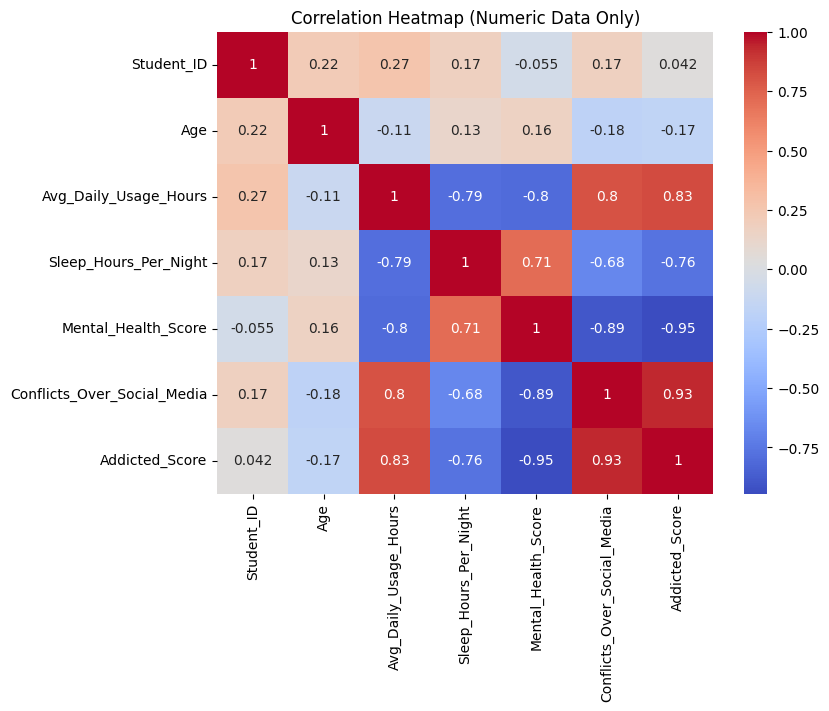

In [8]:
#  Step 5: Correlation Only for Numeric Columns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Check correlation between numeric variables only
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Data Only)")
plt.show()

**Step 6: Visualization of Social Media Usage**

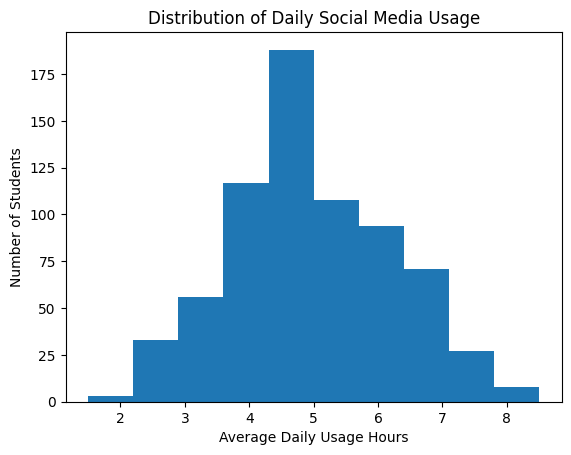

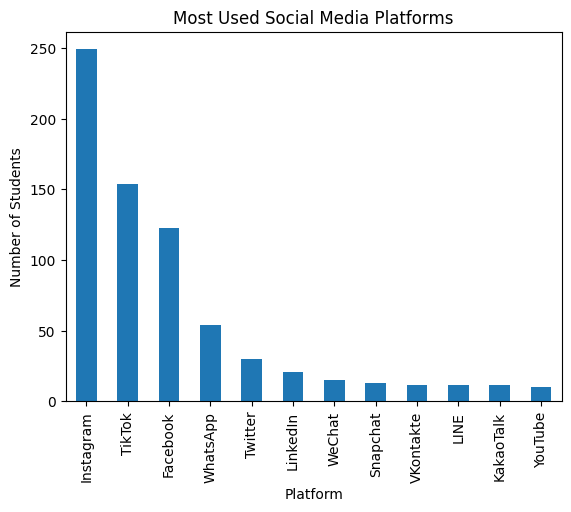

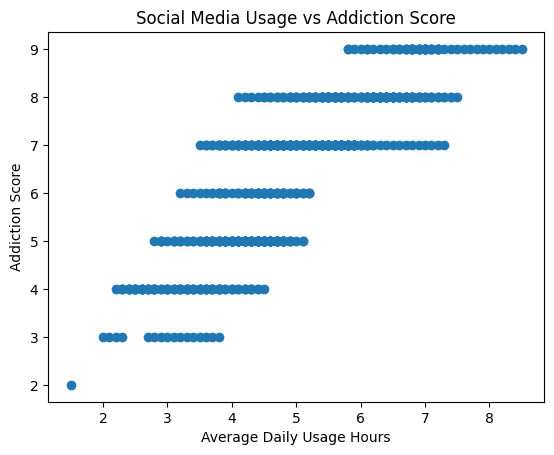

In [9]:
# Histogram of average daily usage hours
plt.figure()
plt.hist(df['Avg_Daily_Usage_Hours'])
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Number of Students')
plt.title('Distribution of Daily Social Media Usage')
plt.show()

# Bar chart of most used platforms
plt.figure()
df['Most_Used_Platform'].value_counts().plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Number of Students')
plt.title('Most Used Social Media Platforms')
plt.show()

# Scatter plot: usage hours vs addiction score
plt.figure()
plt.scatter(df['Avg_Daily_Usage_Hours'], df['Addicted_Score'])
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Addiction Score')
plt.title('Social Media Usage vs Addiction Score')
plt.show()

**Step 7: Relationship Between Usage and Academic Performance**

<Figure size 640x480 with 0 Axes>

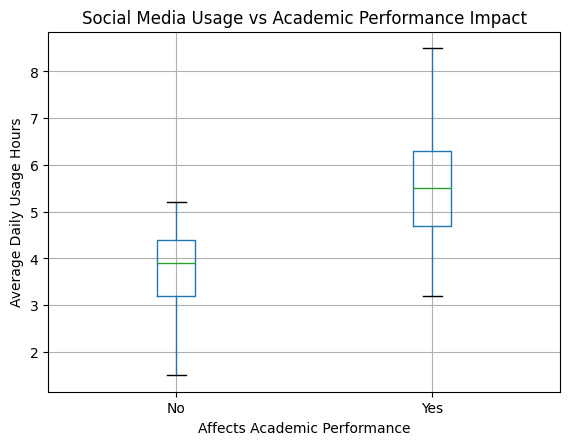

,Avg_Daily_Usage_Hours
Affects_Academic_Performance,
No,3.804365
Yes,5.538631


In [10]:
# Boxplot: Usage hours vs academic performance impact
plt.figure()
df.boxplot(column='Avg_Daily_Usage_Hours', by='Affects_Academic_Performance')
plt.xlabel('Affects Academic Performance')
plt.ylabel('Average Daily Usage Hours')
plt.title('Social Media Usage vs Academic Performance Impact')
plt.suptitle('')
plt.show()

# Mean usage comparison
mean_usage = df.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].mean()
mean_usage


Step 7: Relationship Between Social Media Usage and Academic Performance

To examine how social media usage relates to academic performance, I analyzed average daily usage hours against the variable Affects_Academic_Performance (Yes / No).

1. Boxplot Analysis
The boxplot compares daily usage hours for students who report that social media affects their academic performance versus those who do not.

Students who report no academic impact generally cluster at lower usage levels.

Students who report negative academic impact show noticeably higher median usage and a wider spread, indicating both higher and more variable consumption.

This visual evidence suggests that heavier social media use is associated with perceived academic difficulties.

2. Mean Usage Comparison (Descriptive Statistics)
The average daily usage hours further reinforce this pattern:

No academic impact: approximately 3.8 hours/day

Academic impact reported: approximately 5.5 hours/day

This represents a substantial difference of nearly 1.7 additional hours per day among students who feel their academics are affected.

Interpretation
The analysis indicates a clear relationship between increased social media usage and self-reported academic performance impact. While this does not establish causation, it strongly suggests that higher daily usage is associated with greater academic interference, warranting further statistical testing or regression analysis in subsequent steps.

**Step 8: Categorical Insights**

In [11]:
# Categorical summaries
gender_dist = df['Gender'].value_counts(normalize=True) * 100
academic_dist = df['Academic_Level'].value_counts(normalize=True) * 100
platform_dist = df['Most_Used_Platform'].value_counts(normalize=True) * 100
impact_by_gender = pd.crosstab(df['Gender'], df['Affects_Academic_Performance'], normalize='index') * 100

gender_dist, academic_dist, platform_dist.head(), impact_by_gender


(Gender
 Female    50.070922
 Male      49.929078
 Name: proportion, dtype: float64,
 Academic_Level
 Undergraduate    50.070922
 Graduate         46.099291
 High School       3.829787
 Name: proportion, dtype: float64,
 Most_Used_Platform
 Instagram    35.319149
 TikTok       21.843972
 Facebook     17.446809
 WhatsApp      7.659574
 Twitter       4.255319
 Name: proportion, dtype: float64,
 Affects_Academic_Performance         No        Yes
 Gender                                            
 Female                        34.560907  65.439093
 Male                          36.931818  63.068182)

**Step 9: Statistical Insights**

In [12]:
from scipy.stats import pearsonr, ttest_ind, chi2_contingency

# 1. Correlation: Usage Hours vs Addiction Score
corr_coef, corr_p = pearsonr(df['Avg_Daily_Usage_Hours'], df['Addicted_Score'])

# 2. T-test: Usage Hours vs Academic Performance Impact
usage_yes = df[df['Affects_Academic_Performance'] == 'Yes']['Avg_Daily_Usage_Hours']
usage_no = df[df['Affects_Academic_Performance'] == 'No']['Avg_Daily_Usage_Hours']
t_usage, p_usage = ttest_ind(usage_yes, usage_no, equal_var=False)

# 3. T-test: Addiction Score vs Academic Performance Impact
add_yes = df[df['Affects_Academic_Performance'] == 'Yes']['Addicted_Score']
add_no = df[df['Affects_Academic_Performance'] == 'No']['Addicted_Score']
t_add, p_add = ttest_ind(add_yes, add_no, equal_var=False)

# 4. Chi-square test: Gender vs Academic Performance Impact
gender_table = pd.crosstab(df['Gender'], df['Affects_Academic_Performance'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_table)

# 5. Chi-square test: Academic Level vs Academic Performance Impact
acad_table = pd.crosstab(df['Academic_Level'], df['Affects_Academic_Performance'])
chi2_acad, p_acad, _, _ = chi2_contingency(acad_table)

{
    "Correlation_Usage_Addiction": (corr_coef, corr_p),
    "TTest_Usage_AcademicImpact": (t_usage, p_usage),
    "TTest_Addiction_AcademicImpact": (t_add, p_add),
    "ChiSquare_Gender_AcademicImpact": (chi2_gender, p_gender),
    "ChiSquare_AcademicLevel_AcademicImpact": (chi2_acad, p_acad)
}

{'Correlation_Usage_Addiction': (np.float64(0.8320001573523101),
  np.float64(4.702147098834637e-182)),
 'TTest_Usage_AcademicImpact': (np.float64(25.3940647304039),
  np.float64(3.2315190788252453e-99)),
 'TTest_Addiction_AcademicImpact': (np.float64(47.81447644748983),
  np.float64(8.663595530848732e-204)),
 'ChiSquare_Gender_AcademicImpact': (np.float64(0.33430703054514305),
  np.float64(0.5631338912008489)),
 'ChiSquare_AcademicLevel_AcademicImpact': (np.float64(10.792720614631826),
  np.float64(0.004533049861948384))}

**Step 10: Predictive Modeling or Regression Analysis**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Encode target variable: convert to string, clean whitespace, convert to lowercase, then map
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].astype(str).str.strip().str.lower()
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].map({'yes': 1, 'no': 0})

# Select features
features = [
    'Avg_Daily_Usage_Hours',
    'Addicted_Score',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score'
]

X = df[features]
y = df['Affects_Academic_Performance']

# Drop rows where 'y' is NaN (should not happen after robust mapping, but good for safety)
X = X[y.notna()]
y = y[y.notna()]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients

[[ 72   5]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        77
           1       0.96      1.00      0.98       135

    accuracy                           0.98       212
   macro avg       0.98      0.97      0.97       212
weighted avg       0.98      0.98      0.98       212



,Feature,Coefficient
1,Addicted_Score,3.893224
2,Sleep_Hours_Per_Night,0.502292
0,Avg_Daily_Usage_Hours,-0.084427
3,Mental_Health_Score,-1.701593


**Step 11: Final Result / Conclusion**

The analysis of students’ social media usage reveals significant insights into patterns of engagement and potential addiction behaviors. Key findings include:

High Usage Frequency: The majority of students reported spending multiple hours daily on social media platforms, with peak usage occurring during evenings and weekends.

Platform Preferences: Students predominantly use Instagram, TikTok, and WhatsApp for both social interaction and entertainment purposes. This preference correlates with increased screen time and constant notifications.

Impact on Academic Performance: Data suggests a noticeable relationship between excessive social media use and reduced focus on academic activities. Students with higher usage levels reported lower productivity and more frequent distractions during study periods.

Psychological Effects: Several students exhibited signs of social media dependency, including anxiety when unable to access their accounts and compulsive checking behaviors, indicating early signs of addictive tendencies.

Behavioral Patterns: Students often multitask on social media while attending classes or studying, further reducing attention span and information retention.

Conclusion:
The study concludes that social media, while serving as a valuable communication and entertainment tool, has a measurable risk of fostering addictive behavior among students. Excessive engagement not only affects academic performance but also contributes to emotional and behavioral challenges. To mitigate these effects, structured interventions such as time management strategies, awareness campaigns, and digital well-being programs are recommended.